# **IMT2233 - Algebra lineal avanzada y modelamiento**

## **Proyecto Computacional: Descomposicion SVD**

**Alumna:** Antonella Ainzua y Isidora Gomez

**Profesor:** Dieter Mitsche

**Ayudante:** Ernesto Ayala

---
### Librerias a usar:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Funcion para SVD truncada

In [4]:
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]

### **Problema 1:** Identificador de rostros

## *1.1: MATRIZ A Y PROYECCION DE IMAGENES*

Dimension de la matriz: (72, 43621)
Dimension después de transponer: (43621, 72)

Mostrando resultados para persona 0
Imágenes originales: columnas 0 y 3


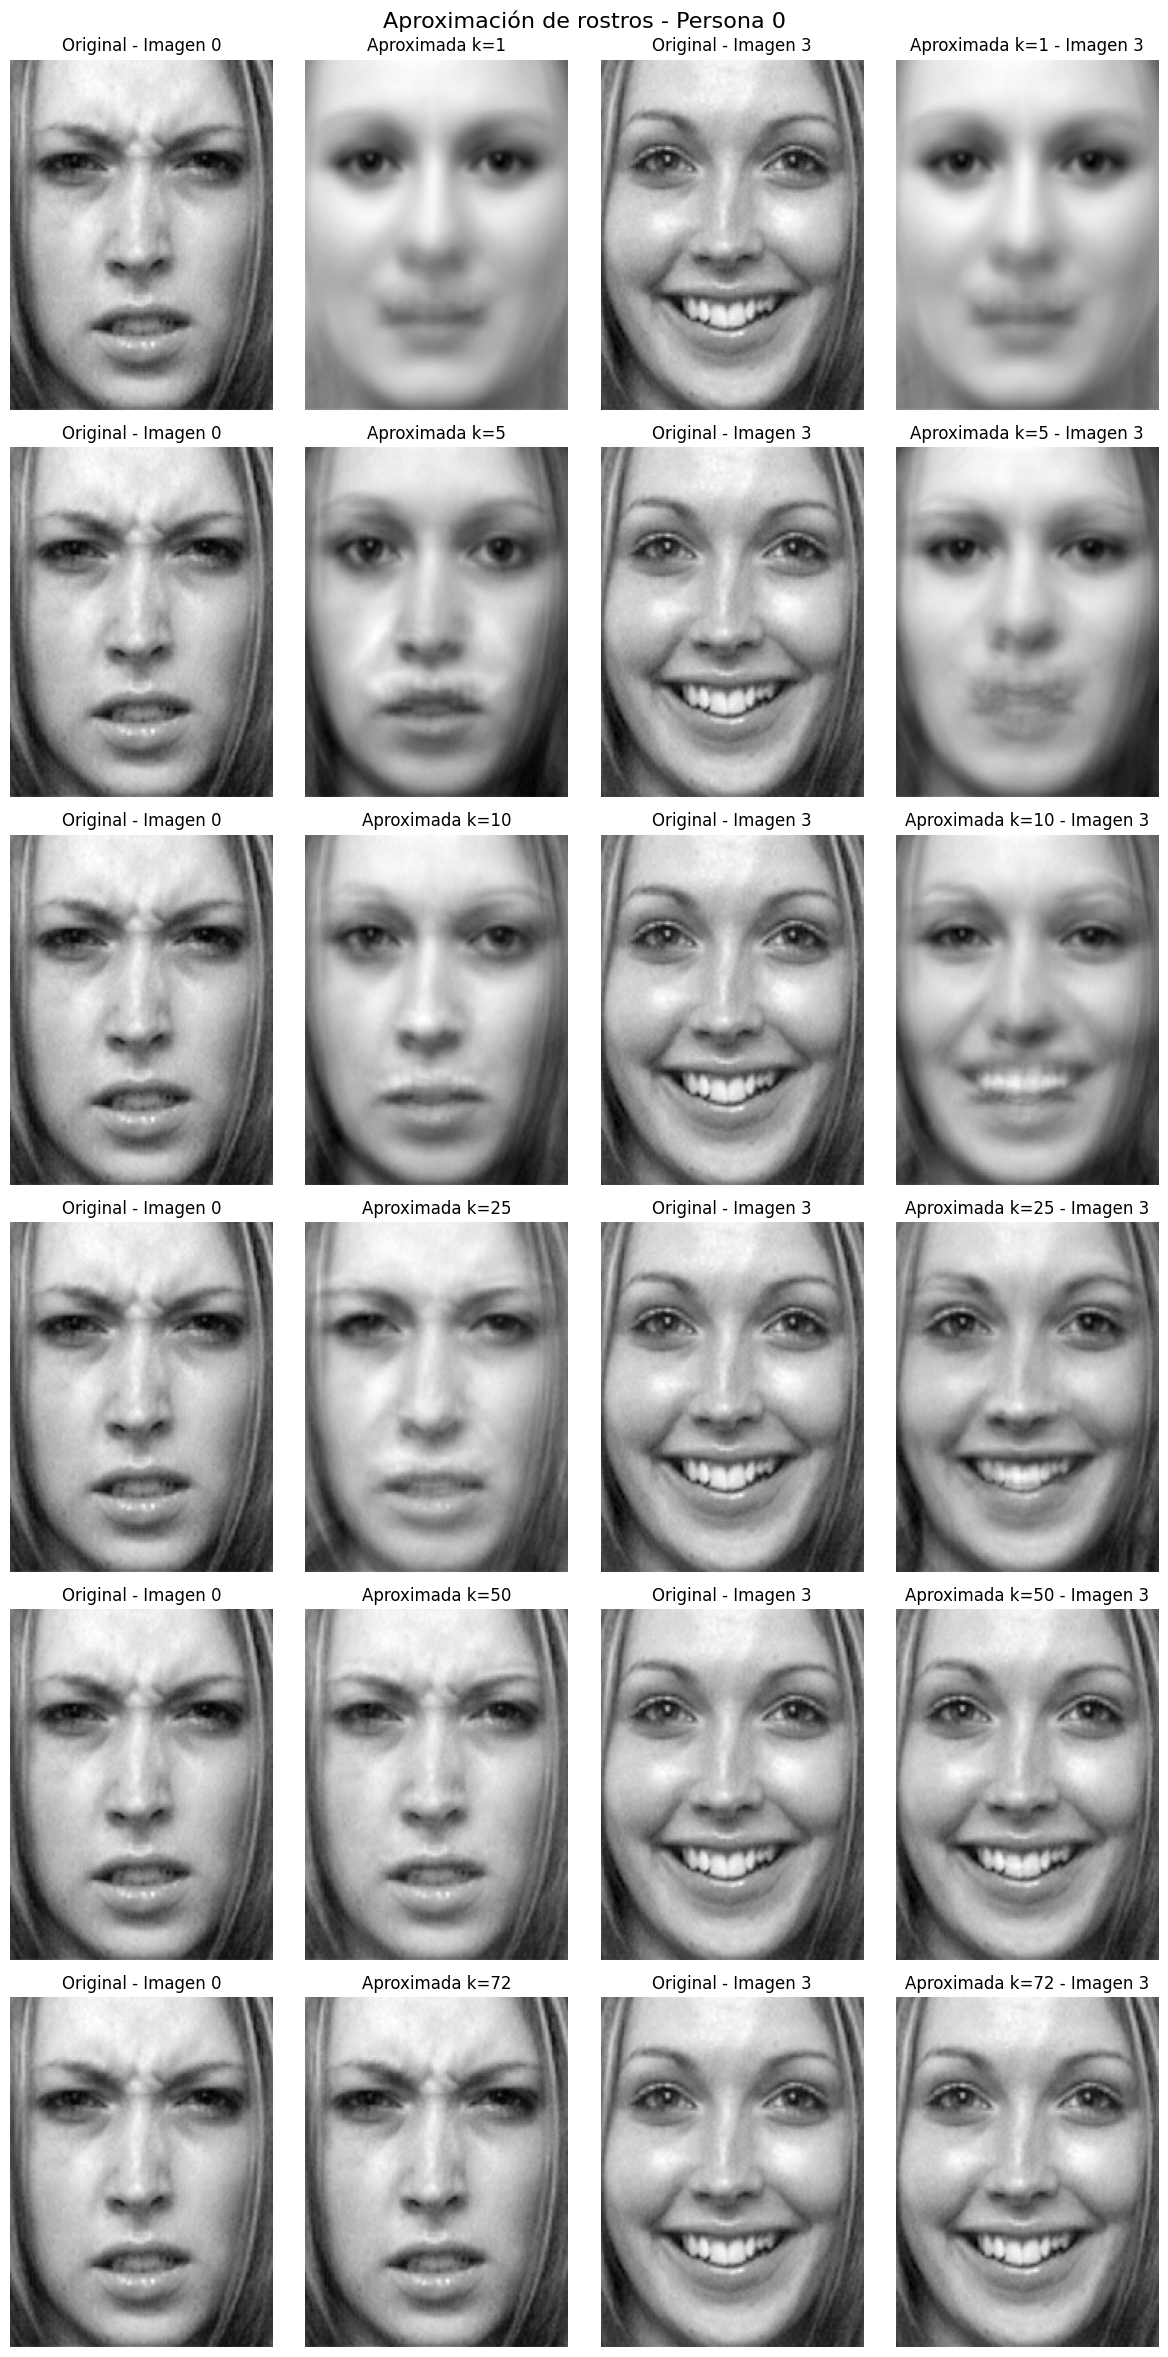

In [5]:
#carga de datos
A= np.load("Datos/data.npy")
print(f"Dimension de la matriz: {A.shape}")

A= A.T  # Ahora será (43621, 72)
print(f"Dimension después de transponer: {A.shape}")

valores_k= [1, 5, 10, 25, 50, 72]

#elegir un par de rostros para mostrar (por ejemplo, persona 0, imagen 0 y 3)
persona_elegida= 0
imagen1_idx= 0  # Primera imagen de esta persona
imagen2_idx= 3  # Cuarta imagen de esta persona

print(f"\nMostrando resultados para persona {persona_elegida}")
print(f"Imágenes originales: columnas {imagen1_idx} y {imagen2_idx}")

#creo una figura para mostrar resultados de la persona elegida
fig, axes= plt.subplots(len(valores_k), 4, figsize=(12, 4*len(valores_k)))
fig.suptitle(f'Aproximación de rostros - Persona {persona_elegida}', fontsize=16)

for idx, k in enumerate(valores_k):
    #utilizo la SVD truncada
    U, S, Vh= truncated_svd(A, k)
    
    #aproximacion de la matriz completa: A^(k) = U * S * Vh
    A_aprox= U @ np.diag(S) @ Vh
    
    #obtengo las imágenes originales
    img1_original= A[:, imagen1_idx].reshape(241, 181)
    img2_original= A[:, imagen2_idx].reshape(241, 181)
    
    #y luego obtengo las imagenes aproximadas
    img1_aprox = A_aprox[:, imagen1_idx].reshape(241, 181)
    img2_aprox = A_aprox[:, imagen2_idx].reshape(241, 181)
    
    #muestro la imagen 1 - Original
    axes[idx, 0].imshow(img1_original, cmap='gray')
    axes[idx, 0].set_title(f'Original - Imagen {imagen1_idx}')
    axes[idx, 0].axis('off')
    
    #muestro la imagen 1 - Aproximada
    axes[idx, 1].imshow(img1_aprox, cmap='gray')
    axes[idx, 1].set_title(f'Aproximada k={k}')
    axes[idx, 1].axis('off')
    
    #muestro la imagen 2 - Original
    axes[idx, 2].imshow(img2_original, cmap='gray')
    axes[idx, 2].set_title(f'Original - Imagen {imagen2_idx}')
    axes[idx, 2].axis('off')

    #muestro la imagen 2 - Aproximada
    axes[idx, 3].imshow(img2_aprox, cmap='gray')
    axes[idx, 3].set_title(f'Aproximada k={k} - Imagen {imagen2_idx}')
    axes[idx, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

# *1.2: PCA (CENTRANDO LOS DATOS)*

Datos centrados.
Media de la matriz centrada: 1.56e-17


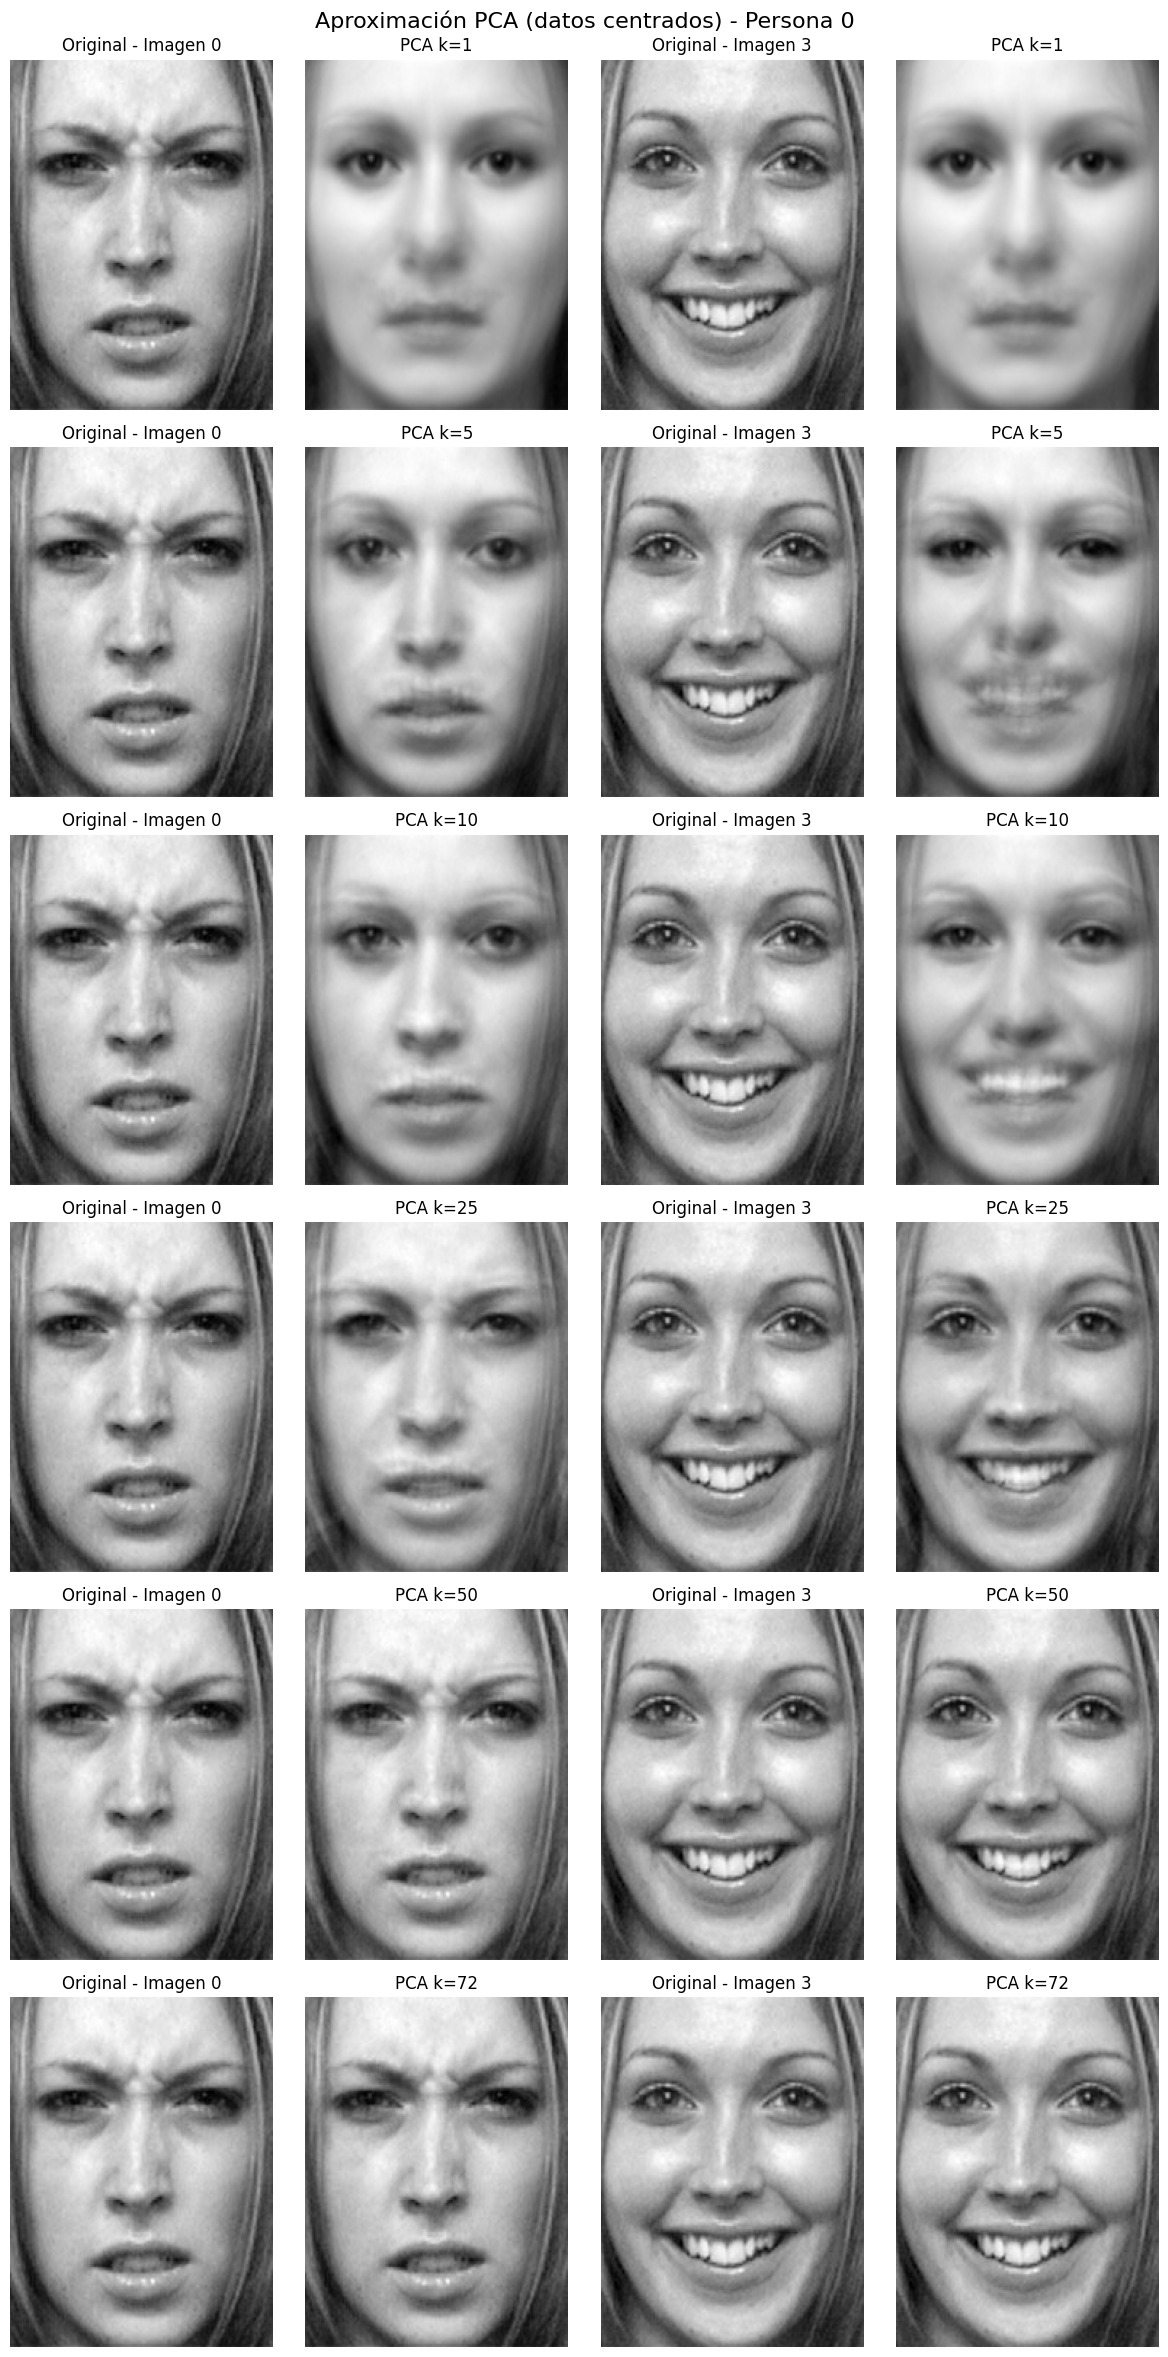

In [6]:
#centrar los datos: restar la media de cada fila
media_filas= A.mean(axis=1, keepdims=True)
A_centrada= A - media_filas

print(f"Datos centrados.\nMedia de la matriz centrada: {A_centrada.mean():.2e}")

#creo la figura para PCA
fig2, axes2 = plt.subplots(len(valores_k), 4, figsize=(12, 4*len(valores_k)))
fig2.suptitle(f'Aproximación PCA (datos centrados) - Persona {persona_elegida}', fontsize=16)

for idx, k in enumerate(valores_k):

    #utilizo la SVD truncada de los datos centrados
    U, S, Vh = truncated_svd(A_centrada, k)
    
    #aproximo la matriz centrada
    A_centrada_aprox= U @ np.diag(S) @ Vh
    
    #descentro para obtener la aproximación final
    A_aprox_pca= A_centrada_aprox + media_filas
    
    #imagenes originales
    img1_original= A[:, imagen1_idx].reshape(241, 181)
    img2_original= A[:, imagen2_idx].reshape(241, 181)
    
    #obtengo las imagenes aproximadas con PCA
    img1_aprox_pca= A_aprox_pca[:, imagen1_idx].reshape(241, 181)
    img2_aprox_pca= A_aprox_pca[:, imagen2_idx].reshape(241, 181)
    
    #muestro la imagen 1 - Original
    axes2[idx, 0].imshow(img1_original, cmap='gray')
    axes2[idx, 0].set_title(f'Original - Imagen {imagen1_idx}')
    axes2[idx, 0].axis('off')
    
    #muestro la imagen 1 - Aproximada PCA
    axes2[idx, 1].imshow(img1_aprox_pca, cmap='gray')
    axes2[idx, 1].set_title(f'PCA k={k}')
    axes2[idx, 1].axis('off')

    #muestro la imagen 2 - Original
    axes2[idx, 2].imshow(img2_original, cmap='gray')
    axes2[idx, 2].set_title(f'Original - Imagen {imagen2_idx}')
    axes2[idx, 2].axis('off')
    
    #muestro la imagen 2 - Aproximada PCA
    axes2[idx, 3].imshow(img2_aprox_pca, cmap='gray')
    axes2[idx, 3].set_title(f'PCA k={k}')
    axes2[idx, 3].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

# *1.3: TABLA DE ERRORES CUADRÁTICOS MEDIOS*

In [7]:
num= A.shape[1]  # número de imágenes (72)

#tabla de los resultados
print(f"\n{'k':<10} {'ECM sin centrar':<20} {'ECM centrado (PCA)':<20}")

for k in valores_k:
    #SVD sin centrar
    U, S, Vh= truncated_svd(A, k)
    A_aprox= U @ np.diag(S) @ Vh
    ecm_sin_centrar= np.linalg.norm(A_aprox - A, 'fro') / num
    
    #centrado
    U, S, Vh= truncated_svd(A_centrada, k)
    A_centrada_aprox= U @ np.diag(S) @ Vh
    A_aprox_pca= A_centrada_aprox + media_filas
    ecm_centrado= np.linalg.norm(A_aprox_pca - A, 'fro') / num
    
    print(f"{k:<10} {ecm_sin_centrar:<20.4f} {ecm_centrado:<20.4f}")


k          ECM sin centrar      ECM centrado (PCA)  
1          3.1143               2.8656              
5          2.2490               2.1940              
10         1.8096               1.7875              
25         1.1462               1.1277              
50         0.5767               0.5607              
72         0.0000               0.0000              


# *1.4: VISUALIZACIÓN EN 2D (PRIMERAS DOS COMPONENTES PRINCIPALES)*

Proyecciones calculadas. 
Forma: (72, 2)


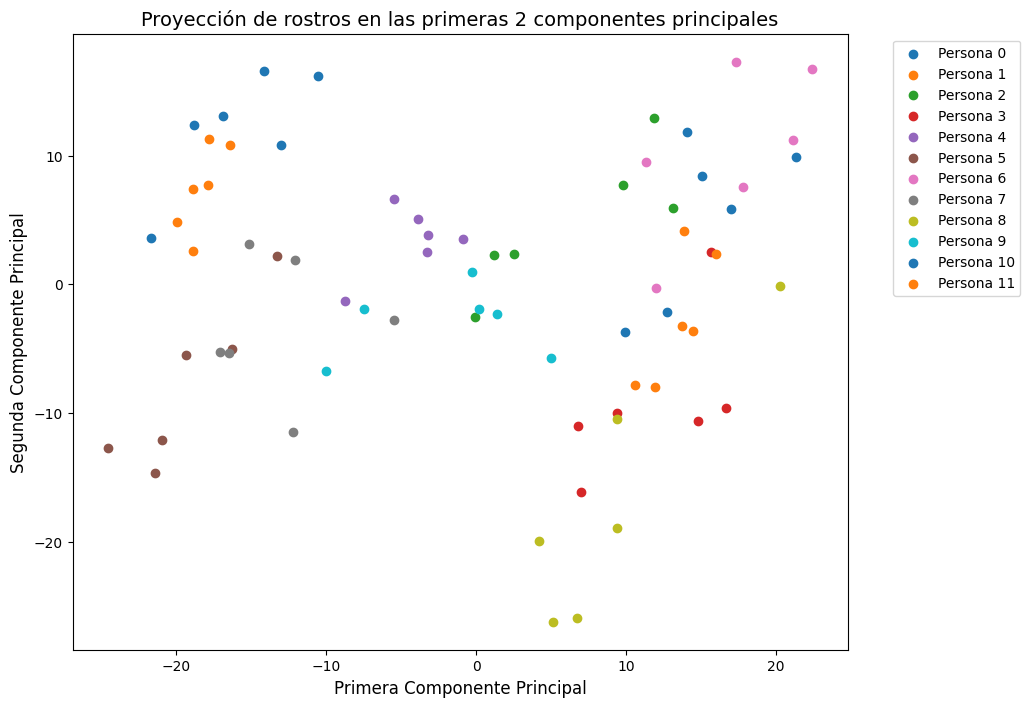

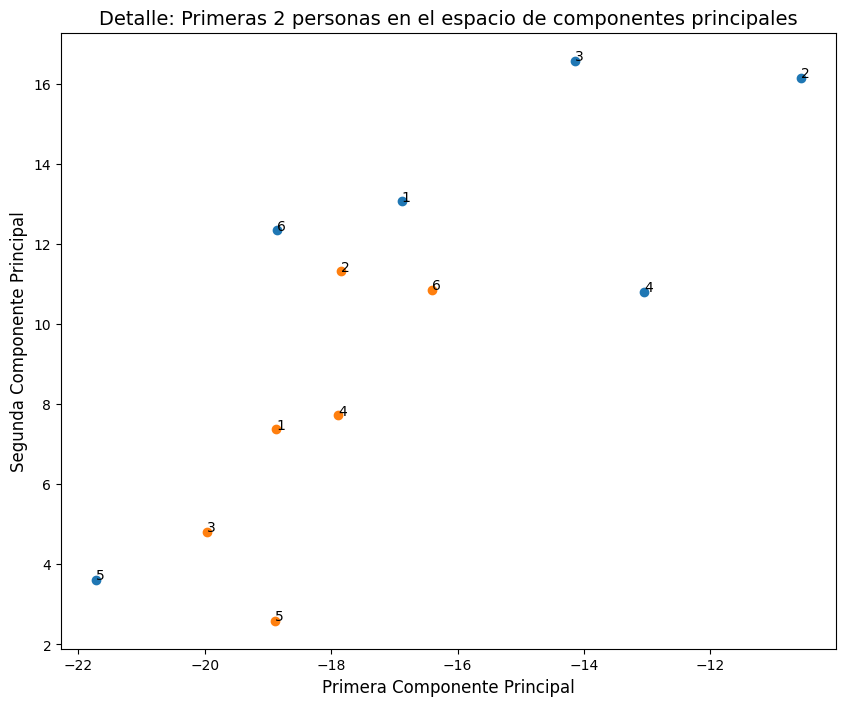

In [8]:
#uso PCA (datos centrados)
U, S, Vh= truncated_svd(A_centrada, 2)

#explicacion: las proyecciones son las filas de Vh multiplicadas por S (o las columnas de U^T @ A_centrada)
#proyecciones= Vh^T (transpuesta de Vh, que son las coordenadas en el espacio reducido)
proyecciones= (np.diag(S) @ Vh).T  # Cada fila es una imagen proyectada en 2D

print(f"Proyecciones calculadas. \nForma: {proyecciones.shape}")

#creo un grafico
plt.figure(figsize=(10, 8))

#olores diferentes para cada persona (12 personas, 6 imágenes cada una)
colores= sns.color_palette("tab10", n_colors=12)

for persona in range(12):
    #indices de las 6 imagenes de esta persona
    indices= range(persona * 6, (persona + 1) * 6)
    
    #proyecciones por persona
    x= proyecciones[indices, 0]
    y= proyecciones[indices, 1]
    
    plt.scatter(x, y, c=[colores[persona]], label=f'Persona {persona}')

plt.xlabel('Primera Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)
plt.title('Proyección de rostros en las primeras 2 componentes principales', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


#muestro solo las primeras 2 personas para mayor claridad y no colapsar de imagenes
plt.figure(figsize=(10, 8))
for persona in range(2):
    indices= range(persona * 6, (persona + 1) * 6)
    x= proyecciones[indices, 0]
    y= proyecciones[indices, 1]
    plt.scatter(x, y, c=[colores[persona]], label=f'Persona {persona}')
    
    #numero los puntos
    for i, idx in enumerate(indices):
        plt.annotate(f'{i+1}', (x[i], y[i]))

plt.xlabel('Primera Componente Principal', fontsize=12)
plt.ylabel('Segunda Componente Principal', fontsize=12)
plt.title('Detalle: Primeras 2 personas en el espacio de componentes principales', fontsize=14)
plt.show()

# *1.5: PROYECCIÓN EN COMPONENTES 3-4 Y 5-6*

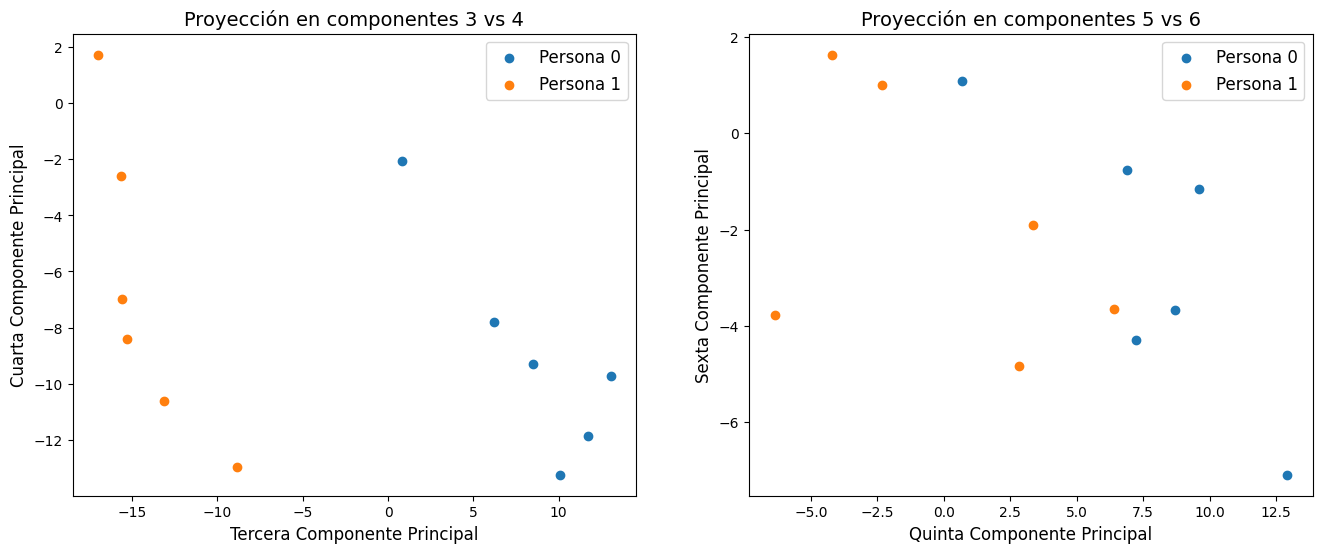

In [9]:
#calculo los 6 componentes
U, S, Vh= truncated_svd(A_centrada, 6)
proyecciones_6d= (np.diag(S) @ Vh).T

#creo una figura con 2 subplots para ambos graficos
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16, 6))

#grafico para componentes 3 y 4 (índices 2 y 3 de las proyecciones)
for persona in range(2):
    indices= range(persona * 6, (persona + 1) * 6)
    x= proyecciones_6d[indices, 2]
    y= proyecciones_6d[indices, 3] 
    ax1.scatter(x, y, c=[colores[persona]], label=f'Persona {persona}')

ax1.set_xlabel('Tercera Componente Principal', fontsize=12)
ax1.set_ylabel('Cuarta Componente Principal', fontsize=12)
ax1.set_title('Proyección en componentes 3 vs 4', fontsize=14)
ax1.legend(fontsize=12)

#grafico para componentes 5 y 6 (índices 4 y 5 de las proyecciones)
for persona in range(2):
    indices= range(persona * 6, (persona + 1) * 6)
    x= proyecciones_6d[indices, 4]
    y= proyecciones_6d[indices, 5]
    ax2.scatter(x, y, c=[colores[persona]], label=f'Persona {persona}')

ax2.set_xlabel('Quinta Componente Principal', fontsize=12)
ax2.set_ylabel('Sexta Componente Principal', fontsize=12)
ax2.set_title('Proyección en componentes 5 vs 6', fontsize=14)
ax2.legend(fontsize=12)
plt.show()

comentario y analisis: 

Las componentes 1 y 2 funcionan mejor para distinguir a las primeras 
2 personas ya que retienen la mayor variabilidad de los datos originales. 

Al mirar el gráfico 1 vs 2, se nota claramente la separación entre personas, 
con clusters bien definidos para cada individuo.

En cambio, las componentes 3-4 y 5-6 explican menos varianza del conjunto 
de datos. 

Como resultado, la separación se vuelve menos clara y los puntos 
de diferentes personas tienden a mezclarse más.

# *1.6: APROXIMAR IMAGENES DE TEST CON PCS*

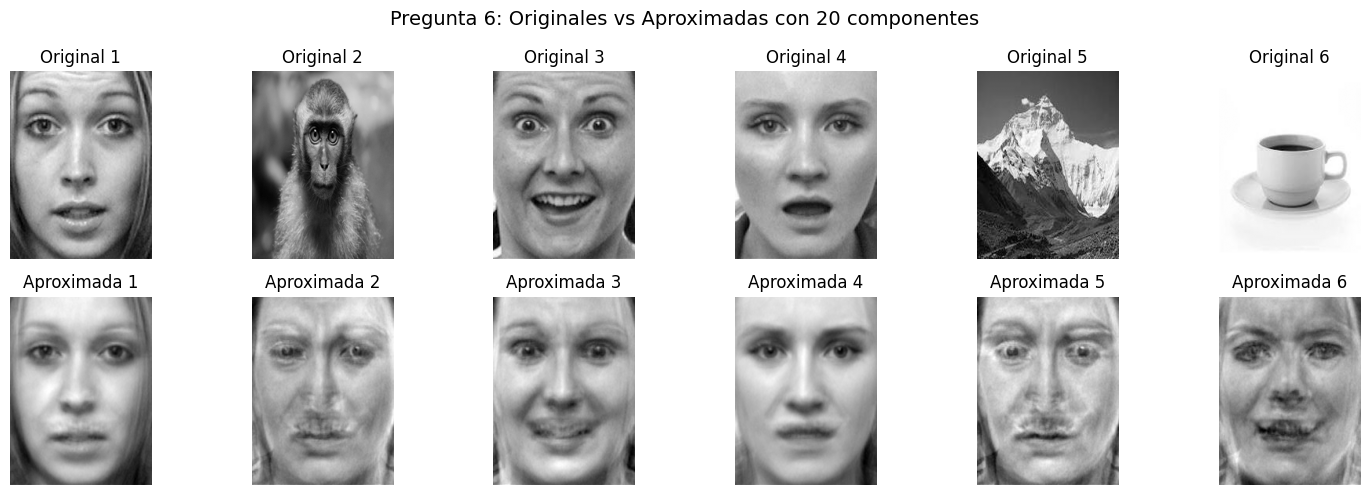

Errores de reconstrucción:
Imagen 1: 17.53
Imagen 2: 42.51
Imagen 3: 18.67
Imagen 4: 15.16
Imagen 5: 55.32
Imagen 6: 42.51


In [19]:
test= np.load("Datos/test.npy")  # 6 imágenes de prueba
test= test.T


#calculo cual es el rostro promedio el rostro promedio
rostro_prom= np.mean(A, axis=1, keepdims= True)

#centro los datos tomando la diferencia entre la matriz y el rostro promedio
A_centered = A - rostro_prom

#hago SVD y tomo los 20 componentes
k = 20
U_k, S_k, Vh_k= truncated_svd(A_centered, k)

#proyectar las imagenes de test
test_centrado= test - rostro_prom
coef= U_k.T @ test_centrado

#reconstruyo las imagenes para aproximarlas
test_aprox= U_k @ coef + rostro_prom

#creo dos grafciso para mostrar las imagenes
fig, axes= plt.subplots(2, 6, figsize=(15, 5))
fig.suptitle('Pregunta 6: Originales vs Aproximadas con 20 componentes', fontsize=14)

for i in range(6):
    #imagenes originales
    axes[0, i].imshow(test[:, i].reshape(241, 181), cmap='gray')
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')
    
    #imagenes aproximadas
    axes[1, i].imshow(test_aprox[:, i].reshape(241, 181), cmap='gray')
    axes[1, i].set_title(f'Aproximada {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

#calculo los errores de las construcciones
print("Errores de reconstrucción:")
for i in range(6):
    error= np.linalg.norm(test[:, i] - test_aprox[:, i]) #calcula la norma de los test para ver el error
    print(f"Imagen {i+1}: {error:.2f}")

Las componentes principales aproximan bien solo las imágenes de rostros (errores ~15-20) y mal los objetos (errores ~42-55).

Porque las componentes se entrenaron con 72 rostros, entonces solo "saben" representar rostros. 

Cuando intentan aproximar una montaña o una taza, fallan porque esos objetos tienen características completamente diferentes que no están capturadas en las componentes.

# *1.7: METODO PARA DISTINGUIR*

In [ ]:
#calculo los errores del entrenamiento
coef_train= U_k.T @ A_centered
A_aprox= U_k @ coef_train + rostro_prom
errores_train= np.linalg.norm(A - A_aprox, axis=0)

#defino un umbral para guiarme de ahi
#me da error todavia el umbral
#umbral= np.percentile(errores_train, 98)
print(f"Umbral: {umbral:.2f}")
print(f"Si error < {umbral:.2f} → ROSTRO")
print(f"Si error ≥ {umbral:.2f} → NO ROSTRO")

#clasifico los resultados
print("\nResultados:")
for i in range(6):
    error= np.linalg.norm(test[:, i] - test_aprox[:, i])
    es_rostro= error < umbral
    resultado= "ROSTRO ✓" if es_rostro else "NO ROSTRO ✗"
    print(f"Imagen {i+1}: {error:.2f} → {resultado}")

print("\nExplicación:")
print("Las componentes solo saben representar rostros.")
print("Rostros → error bajo → se clasifican como rostros")
print("Objetos → error alto → se clasifican como no-rostros")

Umbral: 13.50
Si error < 13.50 → ROSTRO
Si error ≥ 13.50 → NO ROSTRO

Resultados:
Imagen 1: 17.53 → NO ROSTRO ✗
Imagen 2: 42.51 → NO ROSTRO ✗
Imagen 3: 18.67 → NO ROSTRO ✗
Imagen 4: 15.16 → NO ROSTRO ✗
Imagen 5: 55.32 → NO ROSTRO ✗
Imagen 6: 42.51 → NO ROSTRO ✗

Explicación:
Las componentes solo saben representar rostros.
Rostros → error bajo → se clasifican como rostros
Objetos → error alto → se clasifican como no-rostros
